In [3]:
#import the libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading data from csv to dataframe
weather_data=pd.read_csv(r'weather_dataset.csv')

In [9]:
weather_data.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [11]:
weather_data.describe()

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
count,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000
mean,0.579090,6.343128,15.650242,2016.018933,56.089112,66.042406,45.642716,18.791316,6.329820
std,0.988057,3.490723,8.923425,0.136294,18.798295,19.787954,18.559263,6.461527,3.494785
min,0.000000,1.000000,1.000000,2016.000000,-27.000000,-19.000000,-35.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,2016.000000,44.000000,53.000000,33.000000,15.000000,4.040000
50%,0.190000,6.000000,16.000000,2016.000000,58.000000,68.000000,47.000000,19.000000,5.940000
75%,0.750000,9.000000,24.000000,2016.000000,71.000000,82.000000,60.000000,23.000000,8.080000
max,20.890000,12.000000,31.000000,2017.000000,100.000000,111.000000,88.000000,36.000000,61.100000


In [21]:
from datetime import datetime

# Assuming weather_data['Date.Full'] contains string dates in the format 'YYYY-MM-DD'
min_dt_str = weather_data['Date.Full'].min()
max_dt_str = weather_data['Date.Full'].max()

# Convert string dates to datetime objects
min_dt = datetime.strptime(min_dt_str, '%Y-%m-%d')
max_dt = datetime.strptime(max_dt_str, '%Y-%m-%d')

# Printing minimum and maximum dates
print('Minimum date: ' + min_dt_str + ', Maximum date: ' + max_dt_str)

# Calculating the difference in days
difference = max_dt - min_dt
print(difference.days)


Minimum date: 2016-01-03, Maximum date: 2017-01-01
364


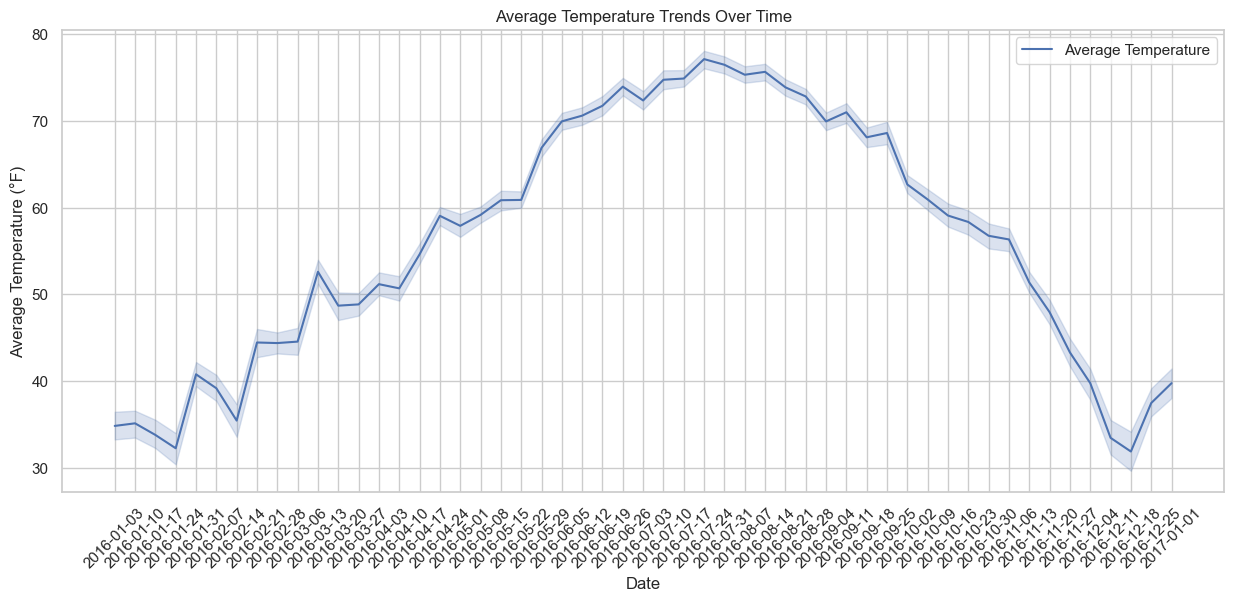

In [12]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Analyzing temperature trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=weather_data, x="Date.Full", y="Data.Temperature.Avg Temp", label="Average Temperature")
plt.title("Average Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°F)")
plt.xticks(rotation=45)
plt.show()

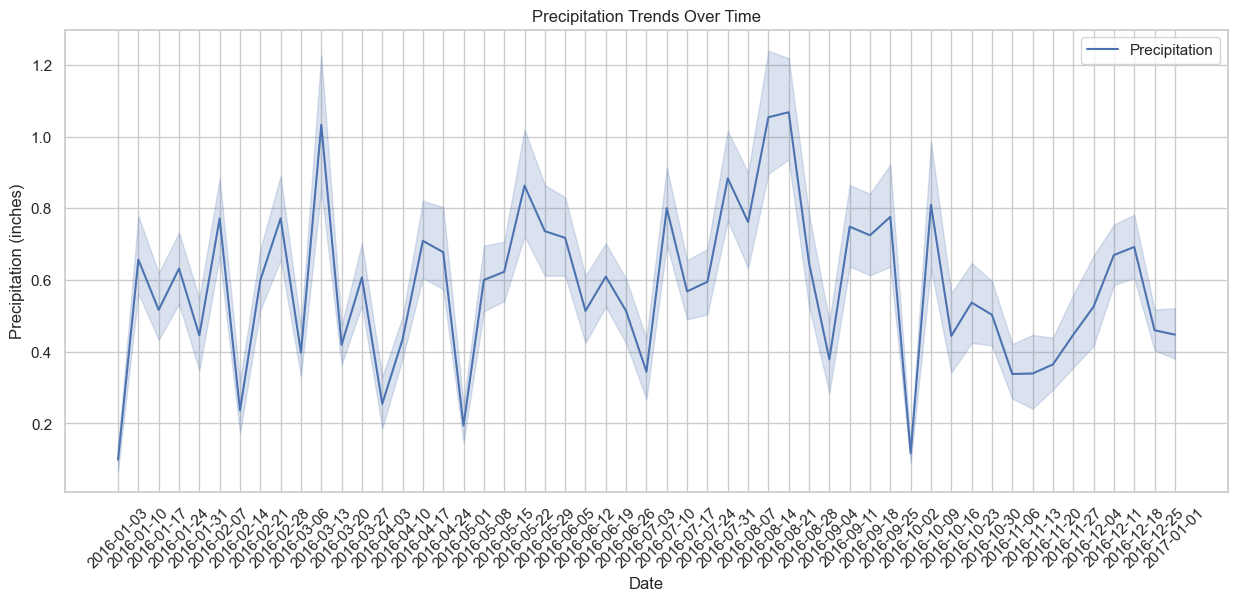

In [22]:
# Analyzing precipitation patterns
plt.figure(figsize=(15, 6))
sns.lineplot(data=weather_data, x="Date.Full", y="Data.Precipitation", label="Precipitation")
plt.title("Precipitation Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.show()

## Observation
The graph shows significant fluctuations in precipitation levels over the period displayed. The data is marked by peaks and troughs indicating variable rainfall across different dates.The graph shows significant volatility in precipitation levels. There are sharp increases and decreases, suggesting that there are days with heavy rainfall followed by periods of little to no rain. Around the middle of the time period shown, there's a sustained rise in precipitation, indicating a possibly wetter period or season.Towards the end of the period, there's a notable decline in precipitation. This could suggest the end of a rainy season or a transition to a drier period.

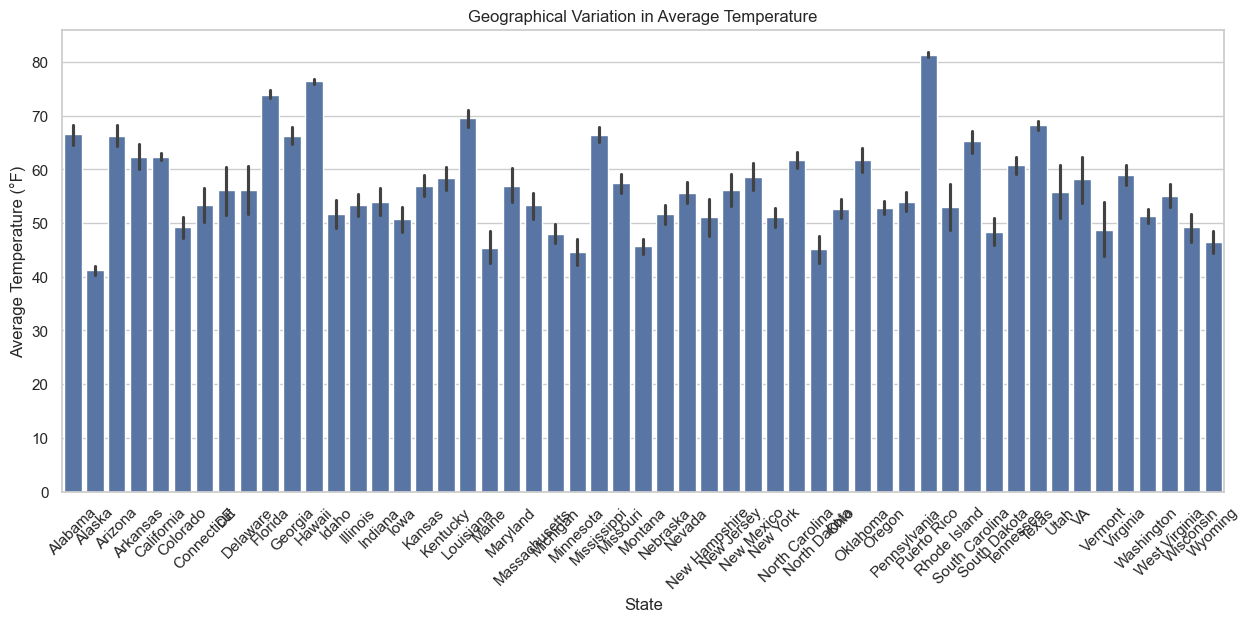

In [23]:
# Geographical variation in average temperature
plt.figure(figsize=(15, 6))
sns.barplot(data=weather_data, x="Station.State", y="Data.Temperature.Avg Temp")
plt.title("Geographical Variation in Average Temperature")
plt.xlabel("State")
plt.ylabel("Average Temperature (°F)")
plt.xticks(rotation=45)
plt.show()

In [24]:
from datetime import datetime


In [25]:
# Convert 'Date.Full' to datetime format for easier manipulation

weather_data['Date.Full'] = pd.to_datetime(weather_data['Date.Full'])


In [27]:
# Yearly Trends in Average Temperature

yearly_avg_temp = weather_data.groupby(weather_data['Date.Full'].dt.year)['Data.Temperature.Avg Temp'].mean()

In [28]:
# Monthly Precipitation Patterns

monthly_precipitation = weather_data.groupby(weather_data['Date.Full'].dt.month)['Data.Precipitation'].mean()

In [29]:
#Wind Speed Analysis

yearly_avg_wind_speed = weather_data.groupby(weather_data['Date.Full'].dt.year)['Data.Wind.Speed'].mean()

In [30]:
# 4. Extremes in Temperature and Precipitation

max_temp = weather_data['Data.Temperature.Max Temp'].max()

min_temp = weather_data['Data.Temperature.Min Temp'].min()

max_precipitation = weather_data['Data.Precipitation'].max()

In [32]:
# 5. State-wise Average Temperature Comparison

statewise_avg_temp = weather_data.groupby('Station.State')['Data.Temperature.Avg Temp'].mean()

# Preparing data for plotting

yearly_avg_temp_df = yearly_avg_temp.reset_index()

monthly_precipitation_df = monthly_precipitation.reset_index()

yearly_avg_wind_speed_df = yearly_avg_wind_speed.reset_index()

statewise_avg_temp_df = statewise_avg_temp.reset_index()


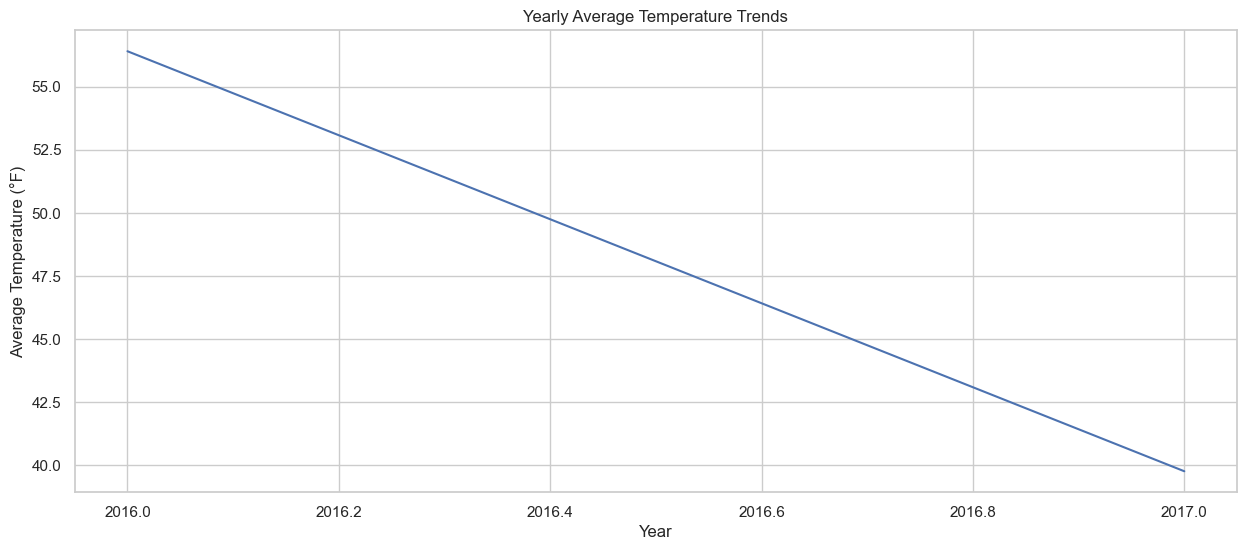

In [33]:
# Plotting the results

plt.figure(figsize=(15, 6))

sns.lineplot(data=yearly_avg_temp_df, x='Date.Full', y='Data.Temperature.Avg Temp')

plt.title('Yearly Average Temperature Trends')

plt.xlabel('Year')

plt.ylabel('Average Temperature (°F)')

plt.show()


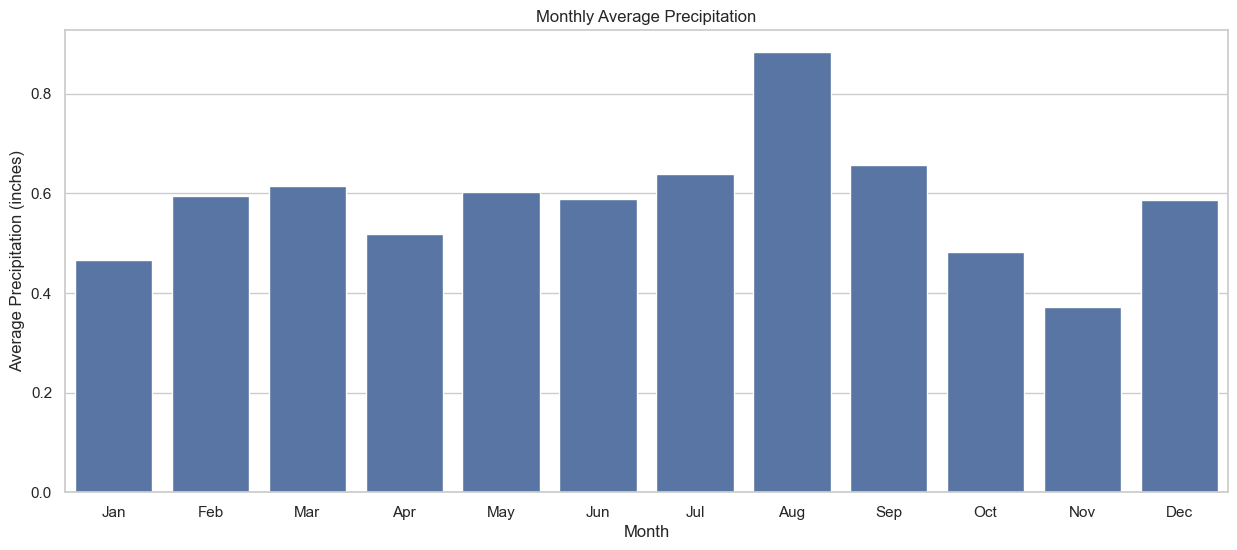

In [34]:
plt.figure(figsize=(15, 6))

sns.barplot(data=monthly_precipitation_df, x='Date.Full', y='Data.Precipitation')

plt.title('Monthly Average Precipitation')

plt.xlabel('Month')

plt.ylabel('Average Precipitation (inches)')

plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


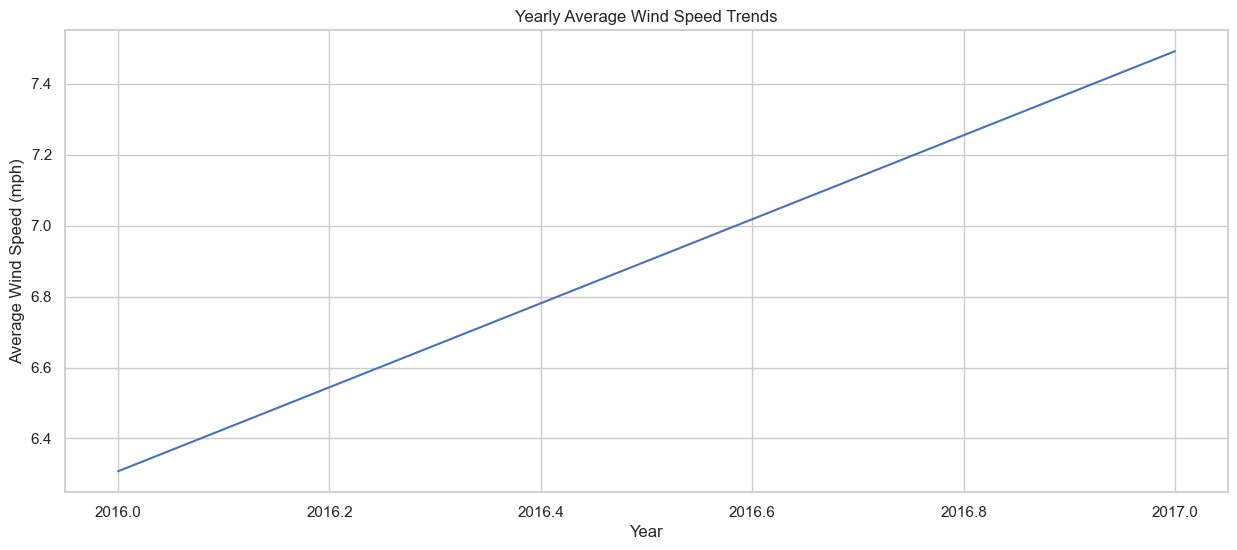

In [35]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=yearly_avg_wind_speed_df, x='Date.Full', y='Data.Wind.Speed')
plt.title('Yearly Average Wind Speed Trends')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (mph)')
plt.show()


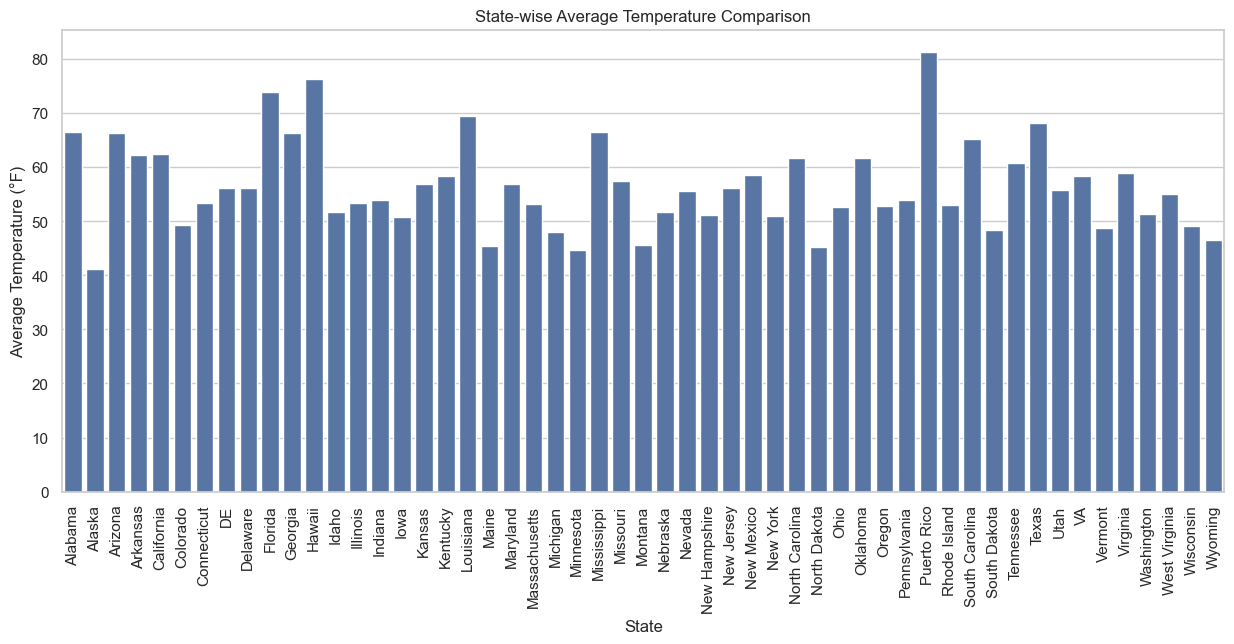

In [36]:
plt.figure(figsize=(15, 6))

sns.barplot(data=statewise_avg_temp_df, x='Station.State', y='Data.Temperature.Avg Temp')

plt.title('State-wise Average Temperature Comparison')
plt.xlabel('State')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=90)
plt.show()

## Observation
This graph is a heat map that vividly illustrates the weather conditions across various U.S. states and territories. It notably highlights Puerto Rico, which stands out with an average temperature of approximately 82°F. The map uses a spectrum of colors to represent temperature variations, clearly indicating Puerto Rico's warm, tropical climate. This color gradient effectively contrasts the island's climate against the cooler temperatures in other regions. The heat map serves not only as a visual representation of current climatic conditions but also provides insights into regional differences in weather patterns. Its depiction of Puerto Rico's distinctly higher temperature is particularly useful for understanding its year-round warm weather, with implications for sectors like tourism, agriculture, and energy.

In [39]:
# Temperature Patterns by State
statewise_temp_patterns = weather_data.groupby(['Station.State', weather_data['Date.Full'].dt.month])['Data.Temperature.Avg Temp'].mean().unstack()

# Precipitation Patterns by State
statewise_precip_patterns = weather_data.groupby(['Station.State', weather_data['Date.Full'].dt.month])['Data.Precipitation'].mean().unstack()

# Wind Speed Patterns by State
statewise_wind_patterns = weather_data.groupby(['Station.State', weather_data['Date.Full'].dt.month])['Data.Wind.Speed'].mean().unstack()

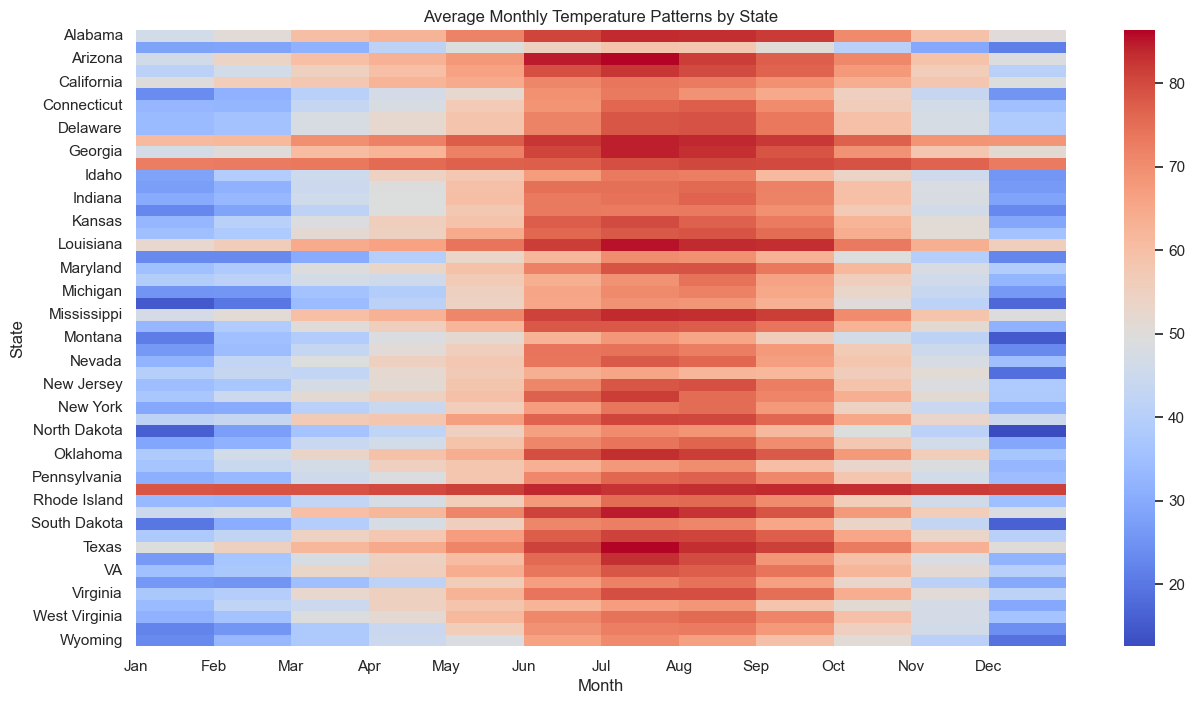

In [40]:
# Visualizing Temperature Patterns by State
plt.figure(figsize=(15, 8))
sns.heatmap(statewise_temp_patterns, cmap="coolwarm", annot=False)
plt.title('Average Monthly Temperature Patterns by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

The weather conditions tend to be warmer during the months of June, July, and August, coinciding with the summer season across all states.